In [24]:
import numpy as np
import datetime
from gridded.depth import S_Depth
from gridded.variable import Variable, VectorVariable
from gridded.grids import Grid_S
from gridded.time import Time
sz=41
node_lat, node_lon = np.mgrid[0:sz,0:sz]
center_el=10
b_data = np.empty((sz,sz))
sig = 0.75
for x in range(0,sz):
    for y in range(0,sz):
        b_data[x,y] = 20 - center_el*np.exp(-0.1*((x-(sz/2))**2 / 2.*((sig)**2) + (y-(sz/2))**2 / 2.*((sig)**2)))
z_data = np.empty((3,sz,sz))
for t in range(0,3):
    for x in range(0,sz):
        for y in range(0,sz):
            z_data[t,x,y] = (t - 1.)/2.
g = Grid_S(node_lon=node_lon, node_lat=node_lat)
bathy = Variable(name='bathy',
                 grid = g,
                 data = b_data)
t_data = np.array([Time.constant_time().data[0] + datetime.timedelta(minutes=10*d) for d in range(0,3)])
zeta = Variable(name='zeta',
                time=Time(data=t_data),
                grid=g,
                data=z_data)

nz = 10

s_w = np.linspace(-1,0,nz)
s_rho = (s_w[0:-1] + s_w[1:]) /2
#equidistant layers, no stretching
Cs_w = np.linspace(-1,0,nz)
# Cs_w = 1-1/np.exp(2*Cs_w)
# Cs_w /= -Cs_w[0]
Cs_r = (Cs_w[0:-1] + Cs_w[1:]) /2
hc = np.array([0,])

sd = S_Depth(time=zeta.time,
             grid=zeta.grid,
             bathymetry=bathy,
             zeta=zeta,
             terms={'s_w':s_w,
                    's_rho':s_rho,
                    'Cs_w':Cs_w,
                    'Cs_r':Cs_r,
                    'hc':hc})

[ 0.]


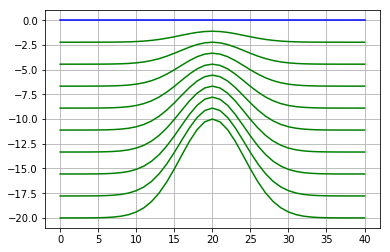

In [26]:
time = sd.time.data[1]
print sd.zeta.at([5,5],time)
levels = sd.get_section(time, 'w')[:,sz/2,:]
levels2 = sd.get_section(time, 'rho')[:,sz/2,:]
import matplotlib.pyplot as plt

plt.plot(-levels[-1], color='b')
for l in levels[0:-1]:
    plt.plot(-l, color='g')
# for l in levels2:
#     plt.plot(-l, color='r')
plt.grid(True)
plt.show()

[-1.         -0.79035892 -0.61871932 -0.4781927  -0.36313923 -0.26894142
 -0.19181878 -0.1286761  -0.07697924 -0.03465344  0.        ]


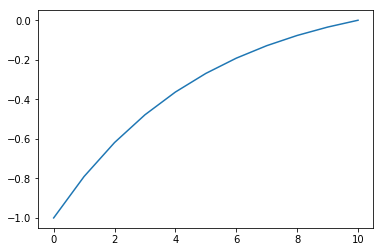

In [19]:
print Cs_w
plt.clf()
plt.plot(Cs_w)
plt.show()